# SC2008 Computer Network

## Lab 4: Analyzing Network traffic log data using python

The objective of this laboratory session is to have a first hand experience in doing basic analysis of data log. Write simple python codes to decipher the network traffic data captured and stored as Microsoft Excel file (.csv). 

### Preparation
Import the necessary libraries.

In [25]:
%pip install seaborn
%pip install networkx
%pip install pandas
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\cihui\appdata\local\programs\python\python311\lib\site-packages (1.5.3)




[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time

In [5]:
# import data
df = pd.read_csv("lab4practice.csv")
print(f'Entries\'s shape (before): {df.shape}')
# drop the last coloumn that contain NaN
df = df.iloc[:, :-1]
print(f'Entries\'s shape (after): {df.shape}')

Entries's shape (before): (1199, 21)
Entries's shape (after): (1199, 20)


In [6]:
# add column headers for better understanding
df.columns = ["Type","sflow_agent_address","inputPort","outputPort", "src_MAC","dst_MAC",
              "ethernet_type","in_vlan","out_vlan", "src_IP","dst_IP","IP_protocol",
              "ip_tos","ip_ttl", "src_port_addr_tplayer","dst_port_addr_tplayer",
              "tcp_flags","packet_size","IP_size","sampling_rate"]

df

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,src_port_addr_tplayer,dst_port_addr_tplayer,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,FLOW,aa.aa.aa.aa,19,21,e00eda07c0ff,28c0da0117ca,0x0800,102.0,2121,202.21.158.254,175.156.15.109,47,0x00,124,32665.0,443,0x10,1459,1437,2048
1195,FLOW,aa.aa.aa.aa,3,14,00235ed9b680,8cb64fe6b643,0x0800,691.0,691,123.136.64.58,165.21.83.88,17,0x00,121,42128.0,53,0x10,91,69,2048
1196,FLOW,aa.aa.aa.aa,3,14,00235ed9b680,8cb64fe6b643,0x0800,691.0,691,202.6.242.63,198.143.33.121,6,0x00,124,443.0,42215,0x10,1522,1500,2048
1197,FLOW,aa.aa.aa.aa,258,130,204e71cf1b0f,00239cd087c1,0x0800,537.0,919,171.67.76.38,137.132.3.10,6,0x00,56,80.0,2182,0x10,1522,1500,2048


## Exercise 4A: TOP TALKERS AND LISTENERS

### 1. Top 5 Talkers
We aim to count the top 5 most frequent `src_IP` in the dataframe

In [7]:
srcIP_df = df["src_IP"].value_counts().rename_axis("IP Address").reset_index(name="Packets")
srcIP_df.index += 1
srcIP_df.head(5)

,IP Address,Packets
1,152.3.219.19,125
2,207.241.228.157,66
3,130.14.250.13,63
4,193.62.192.8,46
5,192.122.131.36,40


Find out the Organisations who owned the correspond IP Addresses we obtained

In [8]:
def getOrg(data, col_name):
    organisation = []
    data[col_name]
    index = 0
    for ip in data[col_name]:
        time.sleep(1)
        if index == 5:
            break
        data = pd.read_json('http://ip-api.com/json/'+str(ip), typ='series')
        organisation.append(data['org'])
        index+=1
        
    return organisation

In [9]:
org = getOrg(srcIP_df, "IP Address")
for i in range(5):
    srcIP_df.loc[i+1, 'Organisation'] = org[i]

srcIP_df.head(5)

,IP Address,Packets,Organisation
1,152.3.219.19,125,Duke University
2,207.241.228.157,66,Internet Archive
3,130.14.250.13,63,National Library of Medicine
4,193.62.192.8,46,European Bioinformatics Institute
5,192.122.131.36,40,A*STAR


### 2. Top 5 Listeners
We aim to count the top 5 most frequent `dst_IP` in the dataframe

In [10]:
dstIP_df = df["dst_IP"].value_counts().rename_axis("IP Address").reset_index(name="Packets")
dstIP_df.index += 1
org = getOrg(dstIP_df, "IP Address")
for i in range(5):
    dstIP_df.loc[i+1, 'Organisation'] = org[i]

dstIP_df.head(5)

,IP Address,Packets,Organisation
1,198.71.44.98,125,Internet2
2,103.37.198.100,98,A*STAR
3,210.48.222.9,66,International Islamic University Of Malaysia
4,137.132.228.15,50,National University of Singapore
5,202.21.159.244,38,Rpnet


## Exercise 4B: TRANSPORT PROTOCOL 

Using the `IP_protocol` type attribute, we aim to determine the percentage of TCP and UDP protocol.

Based on the manual, we knew that **_TCP_** connection has value `6` and **_UDP_** connection has value `17`

In [11]:
protocol_df = df["IP_protocol"].value_counts().rename_axis("Header value").reset_index(name="# of Packets")
protocol_df.index+=1

# get the count for tcp and udp
tcp_df = protocol_df[protocol_df["Header value"]==6]
ucp_df = protocol_df[protocol_df["Header value"]==17]
total_packet = df["IP_protocol"].count()
total_df = pd.DataFrame({"Header value": ["Total"], "# of Packets": [total_packet]})
tcp_udp_df = pd.concat([tcp_df,ucp_df,total_df]).reset_index(drop=True)

tcp_udp_df.insert(1,"Transport layer protocol", ["TCP", "UDP", "All"])
tcp_udp_df.index += 1


In [12]:
# find percentage
TCPnum = int(tcp_udp_df[tcp_udp_df["Transport layer protocol"]=='TCP']['# of Packets'])
UDPnum = int(tcp_udp_df[tcp_udp_df["Transport layer protocol"]=='UDP']['# of Packets'])
totalnum = int(tcp_udp_df[tcp_udp_df["Transport layer protocol"]=='All']['# of Packets'])

TCP_percentage = TCPnum / totalnum * 100
UDP_percentage = UDPnum / totalnum * 100
ALL_percentage = totalnum / totalnum * 100

tcp_udp_df.insert(3, "Percentage (%)", [TCP_percentage, UDP_percentage, ALL_percentage])
tcp_udp_df


,Header value,Transport layer protocol,# of Packets,Percentage (%)
1,6,TCP,879,73.311093
2,17,UDP,135,11.259383
3,Total,All,1199,100.000000


## Exercise 4C: APPLICATIONS PROTOCOL

Using the destination IP port number, ie. `dst_port_addr_tplayer` type attribute, to determine the top 5 most frequently used application protocol.

In [13]:
dst_port_df = df['dst_port_addr_tplayer'].value_counts().rename_axis('Destination IP port number').reset_index(name = "# of packets")
dst_port_df.index+=1
dst_port_df.sort_values('# of packets', ascending = False)

# find the Services correpsond to the Destination IP port number
services = ["https", "Dynamic and/or Private Ports", "Reserved", "Unassigned", "http"]
for i in range(5):
    dst_port_df.loc[i+1, 'Service'] = services[i]

dst_port_df.head(5)

,Destination IP port number,# of packets,Service
1,443,234,https
2,56152,82,Dynamic and/or Private Ports
3,0,81,Reserved
4,43930,45,Unassigned
5,80,37,http


## Exercise 4D: Traffic

The traffic intensity is an important parameter that a network engineer needs to monitor closely to determine if there is congestion (simply by comparing traffic to bandwidth). We will be using the IP packet size, ie. `packet_size` type attribute, to calculate the estimated total traffic over the monitored period of 15 seconds. (Assume the sampling rate is 1 in 2048)  

In [14]:
# assume the units is bytes
packetSize = df["packet_size"].sum()
# convert to MB
packetSize_MB = packetSize/1024/1024
print(f'The network traffic over the monitored period of 15s: {packetSize_MB:.3f}MB')

# repeat the same process, let's see how much IP bytes are being sent out
IPtraffic = df["IP_size"].sum()
IPtraffic_MB = IPtraffic/1024/1024
print(f'The IP traffic over the monitored period of 15s: {IPtraffic_MB:.3f}MB')

MACheader = (1-(IPtraffic_MB/packetSize_MB)) * 100
print(f'Percentage of MAC header as part of network traffic: {MACheader:.3f}%')

The network traffic over the monitored period of 15s: 789.826MB
The IP traffic over the monitored period of 15s: 1.028MB
Percentage of MAC header as part of network traffic: 99.870%


## Exercise 4E: ADDITIONAL ANALYSIS

### 1. Top 5 Communication Pairs

In [15]:
# get the top 5 communication pairs
pair = df.groupby(['src_IP', 'dst_IP']).size().reset_index(name = 'Number of times paired')
pair = pair.sort_values('Number of times paired', ascending=False).reset_index()
pair.drop('index',axis='columns',inplace=True)

# find the corresponding organisation
srcOrg = getOrg(pair, "src_IP")
dstOrg = getOrg(pair, "dst_IP")

for i in range(5):
    pair.loc[i, 'Source Organisation'] = srcOrg[i]
    pair.loc[i, 'Destination Organisation'] = dstOrg[i]

pair.index+=1
pair.head(5)


,src_IP,dst_IP,Number of times paired,Source Organisation,Destination Organisation
1,152.3.219.19,198.71.44.98,125,Duke University,Internet2
2,207.241.228.157,210.48.222.9,66,Internet Archive,International Islamic University Of Malaysia
3,130.14.250.13,103.37.198.100,63,National Library of Medicine,A*STAR
4,193.62.192.8,137.132.228.15,46,European Bioinformatics Institute,National University of Singapore
5,130.14.250.11,103.37.198.100,35,National Library of Medicine,A*STAR


Using the top paired communication pair,

<Axes: xlabel='time'>

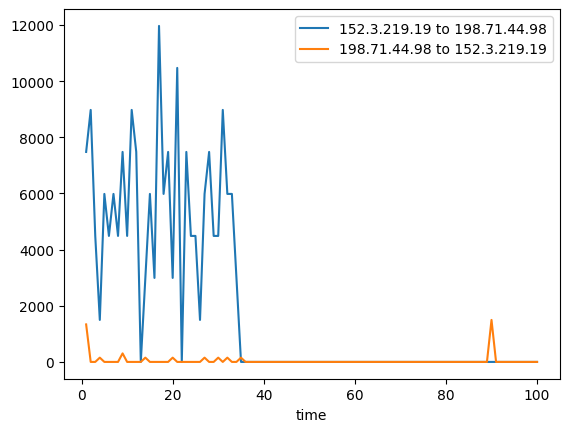

In [16]:
part = np.array_split(df,100)
part2 = part

trafficR = pd.DataFrame(columns=['time', '152.3.219.19 to 198.71.44.98'])
for i,part in enumerate(part):
    trafficR.loc[i] = [i+1, part[(part['src_IP'] == '152.3.219.19') & (part['dst_IP'] == '198.71.44.98')]['IP_size'].sum()]
    
trafficL = pd.DataFrame(columns=['time', '198.71.44.98 to 152.3.219.19'])
for i,part2 in enumerate(part2):
    trafficL.loc[i] = [i+1, part2[(part2['src_IP'] == '198.71.44.98') & (part2['dst_IP'] == '152.3.219.19')]['IP_size'].sum()]
    
graph = trafficR.plot(x='time', y='152.3.219.19 to 198.71.44.98')
trafficL.plot(x='time', y='198.71.44.98 to 152.3.219.19', ax = graph)

### 2. Visualizing of communications between different IP hosts

We will reuse the `pair` dataframe to visualize the host-to-host communications

In [17]:
pair_list = df.groupby(['src_IP','dst_IP']).count()
pair_list = pd.DataFrame(pair_list['Type'])
pair_list.sort_values(by='Type',ascending=False,inplace=True)
pair_list.columns=["count"]
pair_list.head(5)

,,count
src_IP,dst_IP,
152.3.219.19,198.71.44.98,125
207.241.228.157,210.48.222.9,66
130.14.250.13,103.37.198.100,63
193.62.192.8,137.132.228.15,46
130.14.250.11,103.37.198.100,35


In [18]:
pair_list_out = list(pair_list.index)

# build a graph based on the IP pair
graph2 = nx.Graph()
count = 0
for i in pair_list_out:
    graph2.add_edge(i[0],i[1])
    count+=1  
count

332

In [43]:
# ignore all the matplotlidDeprecationWarnings
import warnings
warnings.filterwarnings("ignore")

plt.figure(2,figsize=(100,100))
nx.draw(graph2, with_labels = True, font_size = 10)
plt.show()

### 3. Peak Traffic of Network

Another network graph to visualize `src_IP` to `dst_IP`

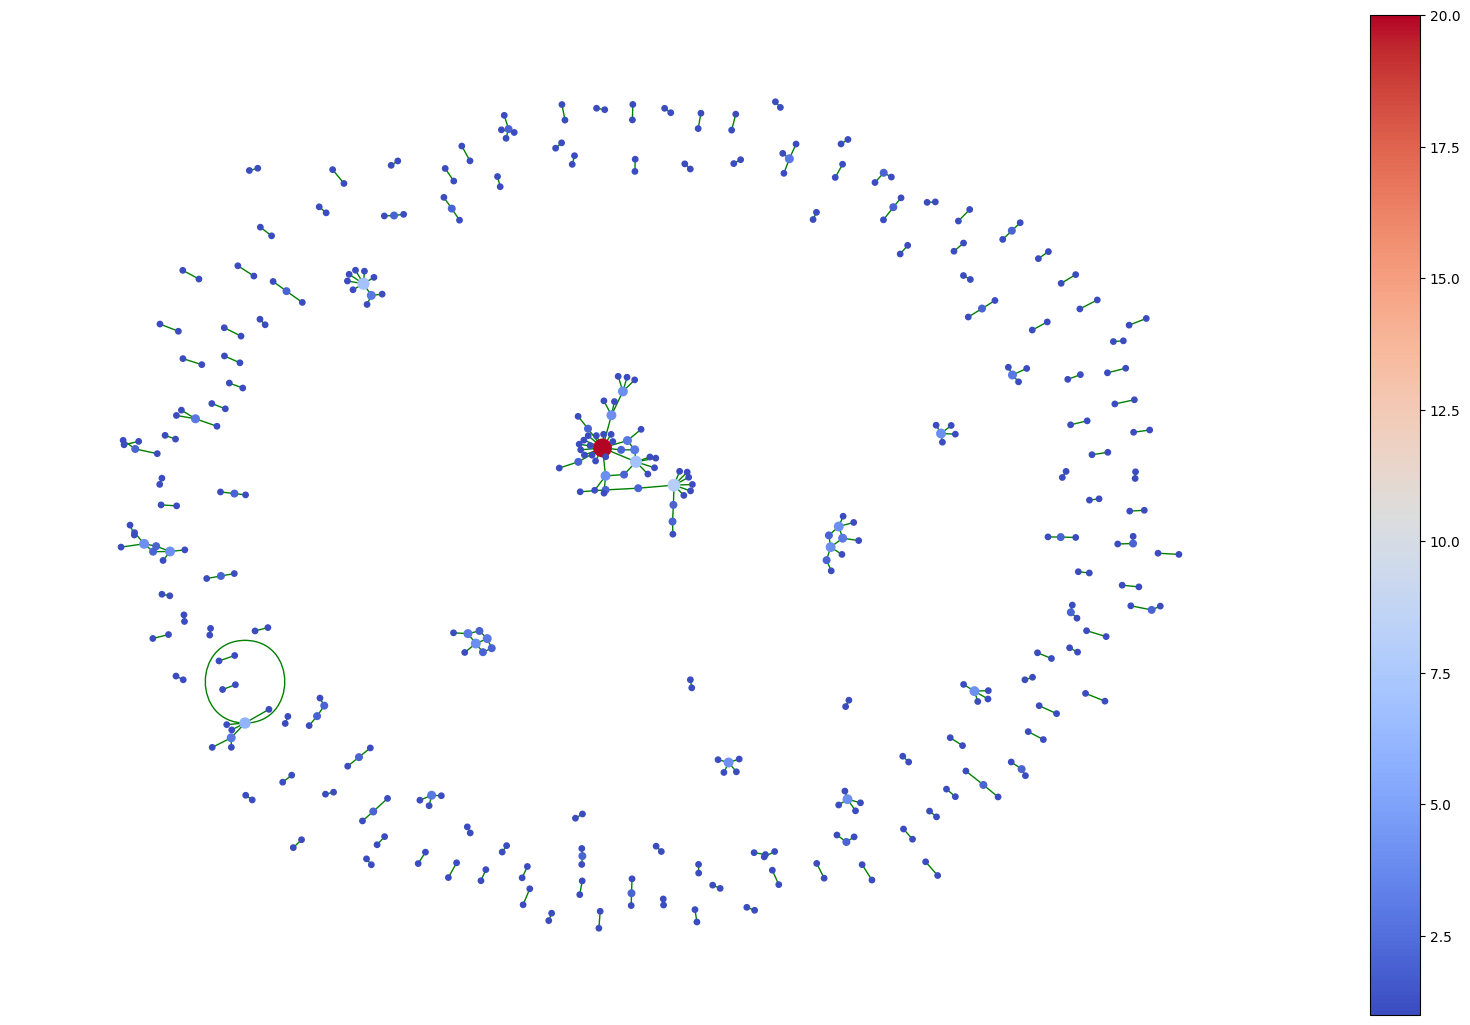

In [40]:
#plt.figure(2,figsize=(80,80))
graph3 = nx.Graph()
graph3 = nx.from_pandas_edgelist(df, 'src_IP', 'dst_IP')

dic = dict(graph3.degree)
degrees = graph3.degree()
nodes = graph3.nodes()
maximum = dic[max(dic, key=dic.get)]
minimum = dic[min(dic, key=dic.get)]
Ncolor = np.asarray([degrees[n]/maximum*20 for n in nodes])
cmap = plt.cm.coolwarm

# only label nodes with degree > 100
label = {n:(n if dic[n] > 300 else '') for n in nodes}
plt.figure(3,figsize=(16,10)) 
nx.draw_spring(graph3, node_size=[(v+1)/maximum*150 for v in dic.values()], node_color=Ncolor,
               cmap=cmap, with_labels=True, labels=label, edge_color='green', font_size=10)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=minimum, vmax=maximum))
plt.colorbar(sm)
plt.show()
